In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_column',122)
pd.set_option('display.max_rows',150)
import pylab
import plotly.express as ply
from pylab import plot,show
from pylab import legend,title,xlabel,ylabel
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
# Reading dataset from local
df = pd.read_csv('Fraud.csv')

In [4]:
# Checking the application dataframe
df.head(10)
df.tail(10)

step      type      amount     nameOrig  oldbalanceOrg  \
6362610   742  TRANSFER    63416.99   C778071008       63416.99   
6362611   742  CASH_OUT    63416.99   C994950684       63416.99   
6362612   743  TRANSFER  1258818.82  C1531301470     1258818.82   
6362613   743  CASH_OUT  1258818.82  C1436118706     1258818.82   
6362614   743  TRANSFER   339682.13  C2013999242      339682.13   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
6362610             0.0  C1812552860            0.00            0.00        1   
6362611             0.0  C1662241365       276433.18       339850.17        1   
6362612             0.0  C1470998563            0.00            0.00        1   
6362613             0.0  C1240760502       503464.50      1762283.33        1   
6362614             0.0  C1850423904            0.00            0.00        1   
6362615             0.0   C776919290            0.00       339682.13        1   
6362616             0.0  C1881841831            0.00            0.00        1   
6362617             0.0  C1365125890        68488.84      6379898.11        1   
6362618             0.0  C2080388513            0.00            0.00        1   
6362619             0.0   C873221189      6510099.11      7360101.63        1   

         isFlaggedFraud  
6362610               0  
6362611               0  
6362612               0  
6362613               0  
6362614               0  
6362615               0  
6362616               0  
6362617               0  
6362618               0  
6362619               0

In [5]:
# Determining the shape of the datset
df.shape

(6362620, 11)

In [6]:
# Determinining no of columns and rows of the dataset
print('Total Rows :',df.shape[0]," Total Columns :",df.shape[1])

Total Rows : 6362620  Total Columns : 11


In [7]:
#Checking information of all the columns and their data types
#Here there are int type as well as object and float type
#Data types of each and every column is know over here
df.info("all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
# Describing the statistical information about the dataframe
df.describe()

step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04   1.420800e+04    0.000000e+00   
75%    3.350000e+02  2.087215e+05   1.073152e+05    1.442584e+05   
max    7.430000e+02  9.244552e+07   5.958504e+07    4.958504e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    6.362620e+06    6.362620e+06  6.362620e+06    6.362620e+06  
mean     1.100702e+06    1.224996e+06  1.290820e-03    2.514687e-06  
std      3.399180e+06    3.674129e+06  3.590480e-02    1.585775e-03  
min      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00  
25%      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00  
50%      1.327057e+05    2.146614e+05  0.000000e+00    0.000000e+00  
75%      9.430367e+05    1.111909e+06  0.000000e+00    0.000000e+00  
max      3.560159e+08    3.561793e+08  1.000000e+00    1.000000e+00

In [9]:
# Describing the statistical information about the dataframe incliuding null values
df.describe(include='all')

step      type        amount     nameOrig  oldbalanceOrg  \
count   6.362620e+06   6362620  6.362620e+06      6362620   6.362620e+06   
unique           NaN         5           NaN      6353307            NaN   
top              NaN  CASH_OUT           NaN  C1462946854            NaN   
freq             NaN   2237500           NaN            3            NaN   
mean    2.433972e+02       NaN  1.798619e+05          NaN   8.338831e+05   
std     1.423320e+02       NaN  6.038582e+05          NaN   2.888243e+06   
min     1.000000e+00       NaN  0.000000e+00          NaN   0.000000e+00   
25%     1.560000e+02       NaN  1.338957e+04          NaN   0.000000e+00   
50%     2.390000e+02       NaN  7.487194e+04          NaN   1.420800e+04   
75%     3.350000e+02       NaN  2.087215e+05          NaN   1.073152e+05   
max     7.430000e+02       NaN  9.244552e+07          NaN   5.958504e+07   

        newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  \
count     6.362620e+06      6362620    6.362620e+06    6.362620e+06   
unique             NaN      2722362             NaN             NaN   
top                NaN  C1286084959             NaN             NaN   
freq               NaN          113             NaN             NaN   
mean      8.551137e+05          NaN    1.100702e+06    1.224996e+06   
std       2.924049e+06          NaN    3.399180e+06    3.674129e+06   
min       0.000000e+00          NaN    0.000000e+00    0.000000e+00   
25%       0.000000e+00          NaN    0.000000e+00    0.000000e+00   
50%       0.000000e+00          NaN    1.327057e+05    2.146614e+05   
75%       1.442584e+05          NaN    9.430367e+05    1.111909e+06   
max       4.958504e+07          NaN    3.560159e+08    3.561793e+08   

             isFraud  isFlaggedFraud  
count   6.362620e+06    6.362620e+06  
unique           NaN             NaN  
top              NaN             NaN  
freq             NaN             NaN  
mean    1.290820e-03    2.514687e-06  
std     3.590480e-02    1.585775e-03  
min     0.000000e+00    0.000000e+00  
25%     0.000000e+00    0.000000e+00  
50%     0.000000e+00    0.000000e+00  
75%     0.000000e+00    0.000000e+00  
max     1.000000e+00    1.000000e+00

In [10]:
# Checking the columns containing null values in the form of True and False
df.isnull()

step   type  amount  nameOrig  oldbalanceOrg  newbalanceOrig  \
0        False  False   False     False          False           False   
1        False  False   False     False          False           False   
2        False  False   False     False          False           False   
3        False  False   False     False          False           False   
4        False  False   False     False          False           False   
...        ...    ...     ...       ...            ...             ...   
6362615  False  False   False     False          False           False   
6362616  False  False   False     False          False           False   
6362617  False  False   False     False          False           False   
6362618  False  False   False     False          False           False   
6362619  False  False   False     False          False           False   

         nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0           False           False           False    False           False  
1           False           False           False    False           False  
2           False           False           False    False           False  
3           False           False           False    False           False  
4           False           False           False    False           False  
...           ...             ...             ...      ...             ...  
6362615     False           False           False    False           False  
6362616     False           False           False    False           False  
6362617     False           False           False    False           False  
6362618     False           False           False    False           False  
6362619     False           False           False    False           False  

[6362620 rows x 11 columns]

In [11]:
# checking the count of null values present in the dataset
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [12]:
df.isnull().sum()*100/len(df)

step              0.0
type              0.0
amount            0.0
nameOrig          0.0
oldbalanceOrg     0.0
newbalanceOrig    0.0
nameDest          0.0
oldbalanceDest    0.0
newbalanceDest    0.0
isFraud           0.0
isFlaggedFraud    0.0
dtype: float64

In [13]:
# Checking values for few columns

# EXPLORATORY DATA ANALYSIS AND VISUALISATION

In [14]:
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [15]:
pie1 = df['type'].value_counts()
transactions = pie1.index
quantity = pie1.values
figure = ply.pie(df, values=quantity, names=transactions, hole = 0.5, title="Distribution of Transaction Type")
figure.show()

In [16]:
df['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

C:\Users\ursha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='isFlaggedFraud', ylabel='count'>

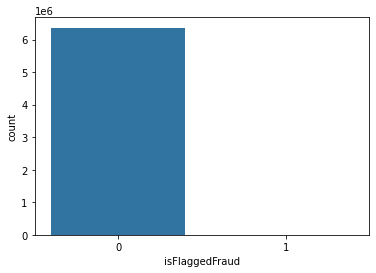

In [17]:
sns.countplot(df['isFlaggedFraud'])

In [18]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

C:\Users\ursha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='isFraud', ylabel='count'>

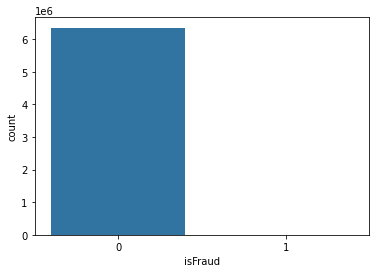

In [19]:
sns.countplot(df['isFraud'])

# CHECKING FOR OUTLIERS

C:\Users\ursha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



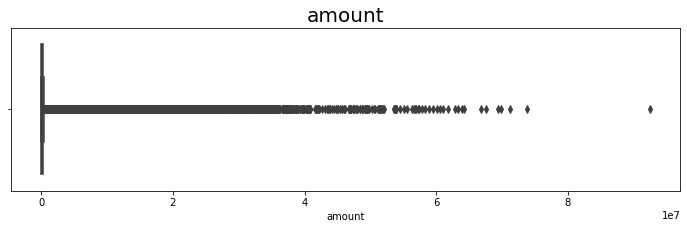

In [20]:
plt.figure(figsize = (12,3))
sns.boxplot(df['amount'])
plt.title('amount',fontsize=20)
plt.show()

C:\Users\ursha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



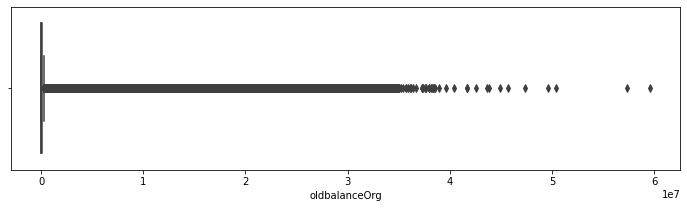

In [21]:
plt.figure(figsize = (12,3))
sns.boxplot(df['oldbalanceOrg'])
plt.show()

C:\Users\ursha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



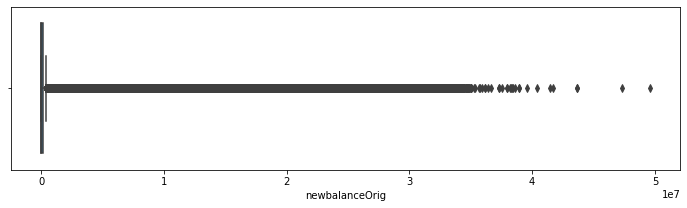

In [22]:
plt.figure(figsize = (12,3))
sns.boxplot(df['newbalanceOrig'])
plt.show()

C:\Users\ursha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



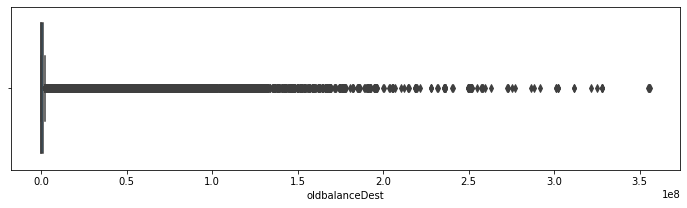

In [23]:
plt.figure(figsize = (12,3))
sns.boxplot(df['oldbalanceDest'])
plt.show()

C:\Users\ursha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



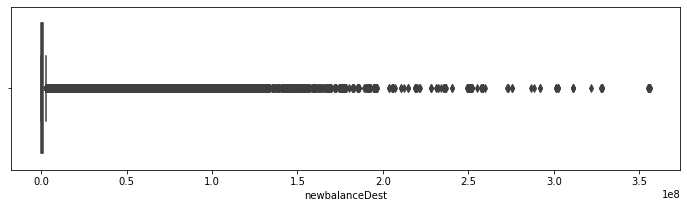

In [24]:
plt.figure(figsize = (12,3))
sns.boxplot(df['newbalanceDest'])
plt.show()

C:\Users\ursha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



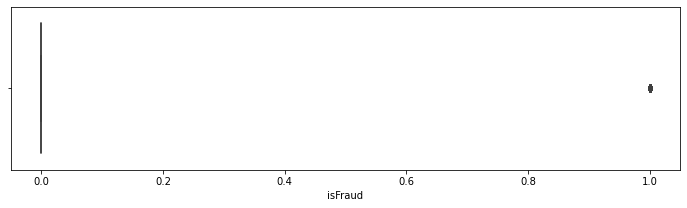

In [25]:
plt.figure(figsize = (12,3))
sns.boxplot(df['isFraud'])
plt.show()

C:\Users\ursha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



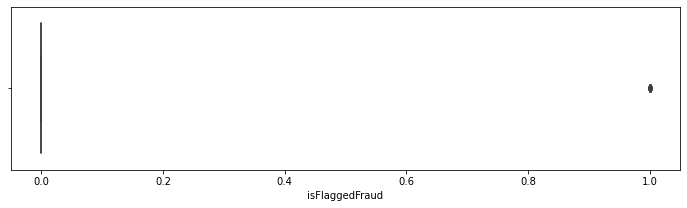

In [26]:
plt.figure(figsize = (12,3))
sns.boxplot(df['isFlaggedFraud'])
plt.show()

# Type

In [27]:
# We are going to look into the type of transactions done

In [28]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

C:\Users\ursha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='type', ylabel='count'>

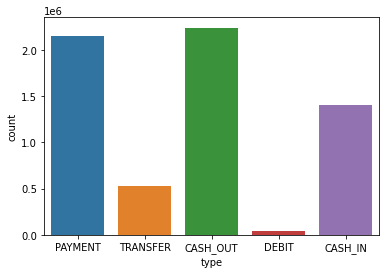

In [29]:
sns.countplot(df['type'])

In [30]:
ctr=pd.crosstab(index=df['type'],columns=df['isFraud'])

(3500.0, 7000.0)

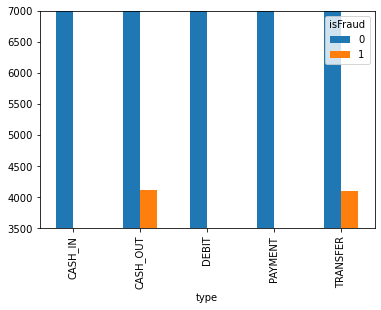

In [31]:
ctr.plot.bar()
plt.ylim([3500, 7000])

In [32]:
df['txn_type'] = np.nan
df.loc[df.nameOrig.str.contains('C') & df.nameDest.str.contains('C'), 'txn_type'] = 'CC'
df.loc[df.nameOrig.str.contains('C') & df.nameDest.str.contains('M'), 'txn_type'] = 'CM'
df.loc[df.nameOrig.str.contains('M') & df.nameDest.str.contains('C'), 'txn_type'] = 'MC'
df.loc[df.nameOrig.str.contains('M') & df.nameDest.str.contains('C'), 'txn_type'] = 'MM'

<AxesSubplot:>

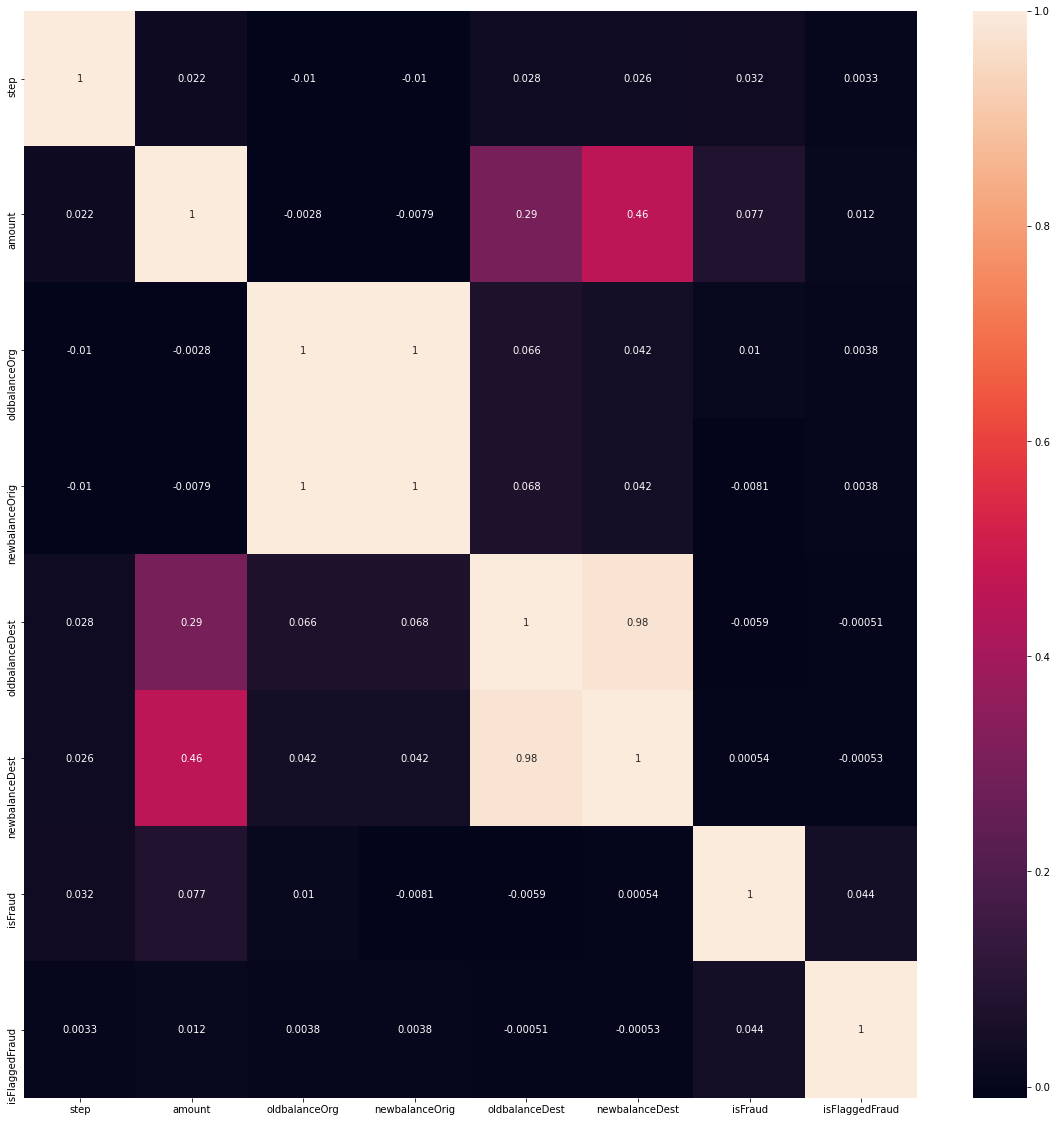

In [33]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

# DROPPING UNNECESSORY COLUMNS

In [34]:
df.drop(['nameOrig','nameDest'],axis=1,inplace=True)

In [35]:
df

step      type      amount  oldbalanceOrg  newbalanceOrig  \
0           1   PAYMENT     9839.64      170136.00       160296.36   
1           1   PAYMENT     1864.28       21249.00        19384.72   
2           1  TRANSFER      181.00         181.00            0.00   
3           1  CASH_OUT      181.00         181.00            0.00   
4           1   PAYMENT    11668.14       41554.00        29885.86   
...       ...       ...         ...            ...             ...   
6362615   743  CASH_OUT   339682.13      339682.13            0.00   
6362616   743  TRANSFER  6311409.28     6311409.28            0.00   
6362617   743  CASH_OUT  6311409.28     6311409.28            0.00   
6362618   743  TRANSFER   850002.52      850002.52            0.00   
6362619   743  CASH_OUT   850002.52      850002.52            0.00   

         oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud txn_type  
0                  0.00            0.00        0               0       CM  
1                  0.00            0.00        0               0       CM  
2                  0.00            0.00        1               0       CC  
3              21182.00            0.00        1               0       CC  
4                  0.00            0.00        0               0       CM  
...                 ...             ...      ...             ...      ...  
6362615            0.00       339682.13        1               0       CC  
6362616            0.00            0.00        1               0       CC  
6362617        68488.84      6379898.11        1               0       CC  
6362618            0.00            0.00        1               0       CC  
6362619      6510099.11      7360101.63        1               0       CC  

[6362620 rows x 10 columns]

# IMBALANCE RATIO

In [36]:
imb = df['isFraud'].value_counts()

In [37]:
print(imb.iloc[1]/imb.iloc[0]*100)

0.129248881917699


# ONE HOT ENCODING

In [38]:
#One hot encoding
df=pd.concat([df,pd.get_dummies(df['type'], prefix='type_')],axis=1)
df.drop(['type'],axis=1,inplace = True)

df.head()

step    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1   9839.64       170136.0       160296.36             0.0   
1     1   1864.28        21249.0        19384.72             0.0   
2     1    181.00          181.0            0.00             0.0   
3     1    181.00          181.0            0.00         21182.0   
4     1  11668.14        41554.0        29885.86             0.0   

   newbalanceDest  isFraud  isFlaggedFraud txn_type  type__CASH_IN  \
0             0.0        0               0       CM              0   
1             0.0        0               0       CM              0   
2             0.0        1               0       CC              0   
3             0.0        1               0       CC              0   
4             0.0        0               0       CM              0   

   type__CASH_OUT  type__DEBIT  type__PAYMENT  type__TRANSFER  
0               0            0              1               0  
1               0            0              1               0  
2               0            0              0               1  
3               1            0              0               0  
4               0            0              1               0

# SPLITTING THE DEPENDENT AND INDEPENDENT VARIABLE

In [68]:
df1=df.copy()
x=df1.drop(['isFraud','txn_type'],axis=1)
y=df1['isFraud']

# BALANCING THE TARGET

# USING SMOTE SAMPLING TECHNIQUE

In [40]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [41]:
oversampler = SMOTE(sampling_strategy='auto', random_state=42)
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
x_train_over, y_smote_over = oversampler.fit_resample(x, y)
x_train_under, y_smote_under = undersampler.fit_resample(x, y)

In [42]:
pie1 = y_smote_over.value_counts()
transactions = pie1.index
quantity = pie1.values
figure = ply.pie(df, values=quantity, names=transactions, hole = 0.5, title="OVERSAMPLING BY SMOTE")
figure.show()

In [43]:
pie1 = y_smote_under.value_counts()
transactions = pie1.index
quantity = pie1.values
figure = ply.pie(df, values=quantity, names=transactions, hole = 0.5, title="UNDERSAMPLING BY SMOTE")
figure.show()

In [44]:
y_smote_over.value_counts()

0    6354407
1    6354407
Name: isFraud, dtype: int64

In [45]:
y_smote_under.value_counts()

0    8213
1    8213
Name: isFraud, dtype: int64

In [46]:
x_train_over

step        amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0            1  9.839640e+03   1.701360e+05       160296.36        0.000000   
1            1  1.864280e+03   2.124900e+04        19384.72        0.000000   
2            1  1.810000e+02   1.810000e+02            0.00        0.000000   
3            1  1.810000e+02   1.810000e+02            0.00    21182.000000   
4            1  1.166814e+04   4.155400e+04        29885.86        0.000000   
...        ...           ...            ...             ...             ...   
12708809   248  1.622713e+06   1.622713e+06            0.00   505566.365403   
12708810   617  1.000000e+07   1.000000e+07            0.00        0.000000   
12708811   208  9.018546e+05   9.018546e+05            0.00   714785.333096   
12708812   404  1.365631e+05   1.365631e+05            0.00        0.000000   
12708813   405  1.022720e+05   1.022720e+05            0.00        0.000000   

          newbalanceDest  isFlaggedFraud  type__CASH_IN  type__CASH_OUT  \
0           0.000000e+00               0              0               0   
1           0.000000e+00               0              0               0   
2           0.000000e+00               0              0               0   
3           0.000000e+00               0              0               1   
4           0.000000e+00               0              0               0   
...                  ...             ...            ...             ...   
12708809    2.138033e+06               0              0               1   
12708810    1.000000e+07               0              0               1   
12708811    1.616640e+06               0              0               1   
12708812    0.000000e+00               0              0               0   
12708813    1.022720e+05               0              0               1   

          type__DEBIT  type__PAYMENT  type__TRANSFER  
0                   0              1               0  
1                   0              1               0  
2                   0              0               1  
3                   0              0               0  
4                   0              1               0  
...               ...            ...             ...  
12708809            0              0               0  
12708810            0              0               0  
12708811            0              0               0  
12708812            0              0               1  
12708813            0              0               0  

[12708814 rows x 12 columns]

In [69]:

# Assuming you have your feature matrix x and target vector y

# Define the oversampling and undersampling techniques
oversampler = SMOTE(sampling_strategy='auto', random_state=42)
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Combine the oversampling and undersampling techniques in a pipeline
hybrid_sampler = [('over', oversampler), ('under', undersampler)]
hybrid = Pipeline(steps=hybrid_sampler)

# Apply the hybrid sampling on the dataset
x_hybrid, y_hybrid = hybrid.fit_resample(x,y)

In [48]:
pie1 = y_hybrid.value_counts()
transactions = pie1.index
quantity = pie1.values
figure = ply.pie(df, values=quantity, names=transactions, hole = 0.5, title="HYBRIDSAMPLING BY SMOTE")
figure.show()

In [70]:
x_hybrid

step         amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0            1    9839.640000  170136.000000       160296.36        0.000000   
1            1    1864.280000   21249.000000        19384.72        0.000000   
4            1   11668.140000   41554.000000        29885.86        0.000000   
5            1    7817.710000   53860.000000        46042.29        0.000000   
6            1    7107.770000  183195.000000       176087.23        0.000000   
...        ...            ...            ...             ...             ...   
7924413    414  187781.547482  187781.547482            0.00        0.000000   
8588896    546  253068.724921  253068.724921            0.00        0.000000   
11280891   102  653978.580933  653978.580933            0.00   164555.182348   
10658979   646  200468.854193  200468.854193            0.00        0.000000   
8047150    408  574990.841350  574990.841350            0.00        0.000000   

          newbalanceDest  isFlaggedFraud  type__CASH_IN  type__CASH_OUT  \
0               0.000000               0              0               0   
1               0.000000               0              0               0   
4               0.000000               0              0               0   
5               0.000000               0              0               0   
6               0.000000               0              0               0   
...                  ...             ...            ...             ...   
7924413    187781.547482               0              0               1   
8588896    253068.724921               0              0               1   
11280891   818533.771997               0              0               1   
10658979        0.000000               0              0               0   
8047150         0.000000               0              0               0   

          type__DEBIT  type__PAYMENT  type__TRANSFER  
0                   0              1               0  
1                   0              1               0  
4                   0              1               0  
5                   0              1               0  
6                   0              1               0  
...               ...            ...             ...  
7924413             0              0               0  
8588896             0              0               0  
11280891            0              0               0  
10658979            0              0               1  
8047150             0              0               1  

[12708814 rows x 12 columns]

# STANDARDIZING THE NUMERICAL COLUMNS

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
scaler = StandardScaler()

In [52]:
x_hybrid = scaler.fit_transform(x_hybrid)

In [53]:
x_hybrid

array([[-1.76067474, -0.43555933, -0.3291673 , ..., -0.05719058,
         2.21516791, -0.63894956],
       [-1.76067474, -0.43983271, -0.37495997, ..., -0.05719058,
         2.21516791, -0.63894956],
       [-1.76067474, -0.43457957, -0.36871483, ..., -0.05719058,
         2.21516791, -0.63894956],
       ...,
       [-1.17859573, -0.09041465, -0.18035348, ..., -0.05719058,
        -0.45143305, -0.63894956],
       [ 1.9565625 , -0.33341574, -0.31983792, ..., -0.05719058,
        -0.45143305,  1.56506876],
       [ 0.58493078, -0.13273812, -0.20464747, ..., -0.05719058,
        -0.45143305,  1.56506876]])

In [54]:
y_hybrid = y_hybrid.values

# TRAIN-TEST SPLIT

In [55]:
from sklearn.model_selection import train_test_split

In [95]:
x_train, x_test, y_train, y_test = train_test_split(x_hybrid, y_hybrid, test_size=0.2, random_state=0)

# BUILDING THE MODELS

# LOGISTIC REGRESSION

In [72]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
mod1 = logr.fit(x_train,y_train)
y_pred = mod1.predict(x_test)

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print("confusion_matrix")
log_conf = confusion_matrix(y_pred,y_test)
print(log_conf)
print()
print("accuracy_score")
log_acc = accuracy_score(y_pred,y_test)
print(log_acc)
print()
print("classification_report")
log_cr = classification_report(y_pred,y_test)
print(log_cr)
print()

confusion_matrix
[[1161250  128058]
 [ 108395 1144060]]

accuracy_score
0.9069728373573775

classification_report
              precision    recall  f1-score   support

           0       0.91      0.90      0.91   1289308
           1       0.90      0.91      0.91   1252455

    accuracy                           0.91   2541763
   macro avg       0.91      0.91      0.91   2541763
weighted avg       0.91      0.91      0.91   2541763




# DECISION TREES

In [63]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
mod2 = dt.fit(x_train,y_train)
y_pred2 = mod2.predict(x_test)

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print("confusion_matrix")
log_conf2 = confusion_matrix(y_pred2,y_test)
print(log_conf2)
print()
print("accuracy_score")
log_acc2 = accuracy_score(y_pred2,y_test)
print(log_acc2)
print()
print("classification_report")
log_cr2 = classification_report(y_pred2,y_test)
print(log_cr2)
print()

confusion_matrix
[[1268991     262]
 [    654 1271856]]

accuracy_score
0.9996396202163617

classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1269253
           1       1.00      1.00      1.00   1272510

    accuracy                           1.00   2541763
   macro avg       1.00      1.00      1.00   2541763
weighted avg       1.00      1.00      1.00   2541763




# RANDOM FORESTS

In [66]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10)
mod3 = rf.fit(x_train,y_train)
y_pred3 = mod3.predict(x_test)

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print("confusion_matrix")
log_conf3 = confusion_matrix(y_pred3,y_test)
print(log_conf3)
print()
print("accuracy_score")
log_acc3 = accuracy_score(y_pred3,y_test)
print(log_acc3)
print()
print("classification_report")
log_cr3 = classification_report(y_pred3,y_test)
print(log_cr3)
print()

confusion_matrix
[[1268811      73]
 [    834 1272045]]

accuracy_score
0.9996431610657642

classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1268884
           1       1.00      1.00      1.00   1272879

    accuracy                           1.00   2541763
   macro avg       1.00      1.00      1.00   2541763
weighted avg       1.00      1.00      1.00   2541763




In [96]:
clf = RandomForestClassifier(n_estimators=12)
if True:
    probabilities = clf.fit(x_train, y_train.values.ravel()).predict(x_test)
from sklearn.metrics import average_precision_score
if True:
    print(average_precision_score(y_test,probabilities))

0.9992992878118516


# NAIVE BAYES

In [73]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train,y_train)
y_pred4 = mod1.predict(x_test)

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print("confusion_matrix")
print(confusion_matrix(y_pred4,y_test))
print()
print("accuracy_score")
print(accuracy_score(y_pred4,y_test))
print()
print("classification_report")
print(classification_report(y_pred4,y_test))
print()

confusion_matrix
[[1161250  128058]
 [ 108395 1144060]]

accuracy_score
0.9069728373573775

classification_report
              precision    recall  f1-score   support

           0       0.91      0.90      0.91   1289308
           1       0.90      0.91      0.91   1252455

    accuracy                           0.91   2541763
   macro avg       0.91      0.91      0.91   2541763
weighted avg       0.91      0.91      0.91   2541763




# X-G BOOST 

In [75]:
import xgboost as xgb
model5 = xgb.XGBClassifier(random_state=1)
modl  = model5.fit(x_train, y_train)
y_pred5 = mod1.predict(x_test)

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print("confusion_matrix")
print(confusion_matrix(y_pred5,y_test))
print()
print("accuracy_score")
print(accuracy_score(y_pred5,y_test))
print()
print("classification_report")
print(classification_report(y_pred5,y_test))
print()

C:\Users\ursha\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[20:36:14] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


KeyboardInterrupt: 

# KNN

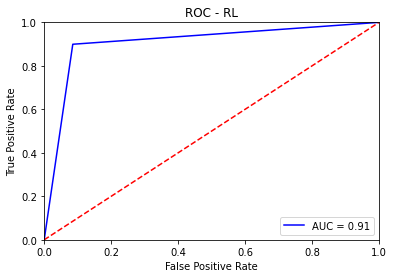

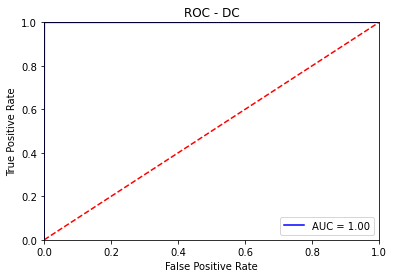

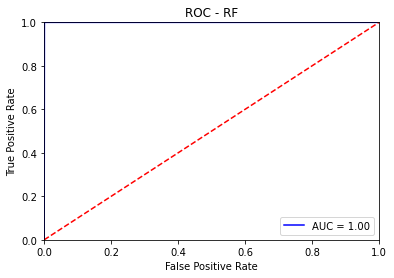

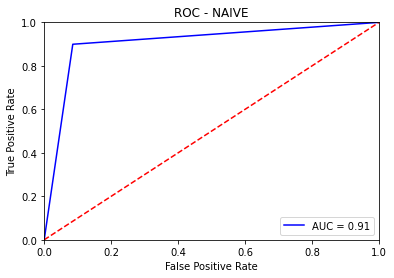

In [76]:
import sklearn.metrics as metrics

# AUC ROC - Logistic Regression

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - RL')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# AUC ROC - Decision Tree

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred2)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - DC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# AUC ROC - Random forest Tree

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred3)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


# AUC ROC - NAIVE BAYES

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred4)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - NAIVE')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [106]:
model_acc={'model_name':['Logistic Regression','Decision Tree','Random Forest','Naive Bayes'],'Acc':[log_acc,log_acc2,log_acc3,accuracy_score(y_pred4,y_test)]}

In [107]:
model_acc=pd.DataFrame(model_acc)

In [108]:
model_acc

model_name       Acc
0  Logistic Regression  0.906973
1        Decision Tree  0.999640
2        Random Forest  0.999643
3          Naive Bayes  0.906973

In [109]:
model_acc['Acc'].sort_values

<bound method Series.sort_values of 0    0.906973
1    0.999640
2    0.999643
3    0.906973
Name: Acc, dtype: float64>

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'Decision Tree'),
  Text(2, 0, 'Random Forest'),
  Text(3, 0, 'Naive Bayes')])

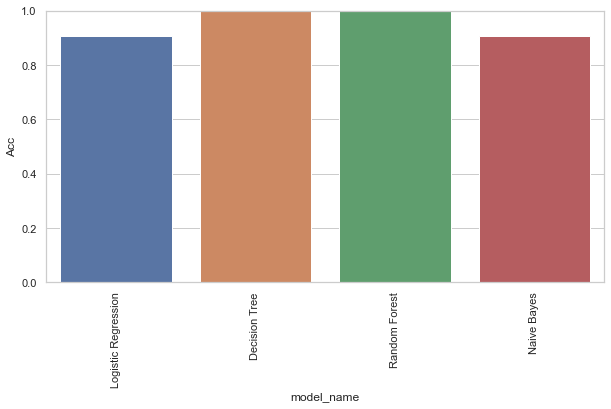

In [113]:
plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=model_acc.model_name, y=model_acc.Acc, data=model_acc)
ax.set(ylim=(0, 1))
plt.xticks(rotation=90)

# SECOND APPROACH

In [77]:
df

step      amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0           1     9839.64      170136.00       160296.36            0.00   
1           1     1864.28       21249.00        19384.72            0.00   
2           1      181.00         181.00            0.00            0.00   
3           1      181.00         181.00            0.00        21182.00   
4           1    11668.14       41554.00        29885.86            0.00   
...       ...         ...            ...             ...             ...   
6362615   743   339682.13      339682.13            0.00            0.00   
6362616   743  6311409.28     6311409.28            0.00            0.00   
6362617   743  6311409.28     6311409.28            0.00        68488.84   
6362618   743   850002.52      850002.52            0.00            0.00   
6362619   743   850002.52      850002.52            0.00      6510099.11   

         newbalanceDest  isFraud  isFlaggedFraud txn_type  type__CASH_IN  \
0                  0.00        0               0       CM              0   
1                  0.00        0               0       CM              0   
2                  0.00        1               0       CC              0   
3                  0.00        1               0       CC              0   
4                  0.00        0               0       CM              0   
...                 ...      ...             ...      ...            ...   
6362615       339682.13        1               0       CC              0   
6362616            0.00        1               0       CC              0   
6362617      6379898.11        1               0       CC              0   
6362618            0.00        1               0       CC              0   
6362619      7360101.63        1               0       CC              0   

         type__CASH_OUT  type__DEBIT  type__PAYMENT  type__TRANSFER  
0                     0            0              1               0  
1                     0            0              1               0  
2                     0            0              0               1  
3                     1            0              0               0  
4                     0            0              1               0  
...                 ...          ...            ...             ...  
6362615               1            0              0               0  
6362616               0            0              0               1  
6362617               1            0              0               0  
6362618               0            0              0               1  
6362619               1            0              0               0  

[6362620 rows x 14 columns]

In [79]:
df2 = df.copy()

In [80]:
df2['Actual_amount_orig'] = df2.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
df2['Actual_amount_dest'] = df2.apply(lambda x: x['newbalanceDest'] - x['oldbalanceDest'],axis=1)

In [81]:
df2.head()

step    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1   9839.64       170136.0       160296.36             0.0   
1     1   1864.28        21249.0        19384.72             0.0   
2     1    181.00          181.0            0.00             0.0   
3     1    181.00          181.0            0.00         21182.0   
4     1  11668.14        41554.0        29885.86             0.0   

   newbalanceDest  isFraud  isFlaggedFraud txn_type  type__CASH_IN  \
0             0.0        0               0       CM              0   
1             0.0        0               0       CM              0   
2             0.0        1               0       CC              0   
3             0.0        1               0       CC              0   
4             0.0        0               0       CM              0   

   type__CASH_OUT  type__DEBIT  type__PAYMENT  type__TRANSFER  \
0               0            0              1               0   
1               0            0              1               0   
2               0            0              0               1   
3               1            0              0               0   
4               0            0              1               0   

   Actual_amount_orig  Actual_amount_dest  
0             9839.64                 0.0  
1             1864.28                 0.0  
2              181.00                 0.0  
3              181.00            -21182.0  
4            11668.14                 0.0

In [82]:
x = df2['Actual_amount_orig'] - df2['Actual_amount_dest']
x = round(x,0)
l=[]
for i in range(len(x)):
    if x[i]==0:
        l.append(0)
    else:
        l.append(1)


In [83]:
# Created new Feature 
df2['Target']=l

In [85]:
df2

step      amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0           1     9839.64      170136.00       160296.36            0.00   
1           1     1864.28       21249.00        19384.72            0.00   
2           1      181.00         181.00            0.00            0.00   
3           1      181.00         181.00            0.00        21182.00   
4           1    11668.14       41554.00        29885.86            0.00   
...       ...         ...            ...             ...             ...   
6362615   743   339682.13      339682.13            0.00            0.00   
6362616   743  6311409.28     6311409.28            0.00            0.00   
6362617   743  6311409.28     6311409.28            0.00        68488.84   
6362618   743   850002.52      850002.52            0.00            0.00   
6362619   743   850002.52      850002.52            0.00      6510099.11   

         newbalanceDest  isFraud  isFlaggedFraud txn_type  type__CASH_IN  \
0                  0.00        0               0       CM              0   
1                  0.00        0               0       CM              0   
2                  0.00        1               0       CC              0   
3                  0.00        1               0       CC              0   
4                  0.00        0               0       CM              0   
...                 ...      ...             ...      ...            ...   
6362615       339682.13        1               0       CC              0   
6362616            0.00        1               0       CC              0   
6362617      6379898.11        1               0       CC              0   
6362618            0.00        1               0       CC              0   
6362619      7360101.63        1               0       CC              0   

         type__CASH_OUT  type__DEBIT  type__PAYMENT  type__TRANSFER  \
0                     0            0              1               0   
1                     0            0              1               0   
2                     0            0              0               1   
3                     1            0              0               0   
4                     0            0              1               0   
...                 ...          ...            ...             ...   
6362615               1            0              0               0   
6362616               0            0              0               1   
6362617               1            0              0               0   
6362618               0            0              0               1   
6362619               1            0              0               0   

         Actual_amount_orig  Actual_amount_dest  Target  
0                   9839.64                0.00       1  
1                   1864.28                0.00       1  
2                    181.00                0.00       1  
3                    181.00           -21182.00       1  
4                  11668.14                0.00       1  
...                     ...                 ...     ...  
6362615           339682.13           339682.13       0  
6362616          6311409.28                0.00       1  
6362617          6311409.28          6311409.27       0  
6362618           850002.52                0.00       1  
6362619           850002.52           850002.52       0  

[6362620 rows x 17 columns]

In [88]:
# Dropping unnecessary column which is not useful for prediction model (mostly all are unique values)
df2.drop(['Actual_amount_orig','Actual_amount_dest'],axis=1,inplace = True)

<AxesSubplot:>

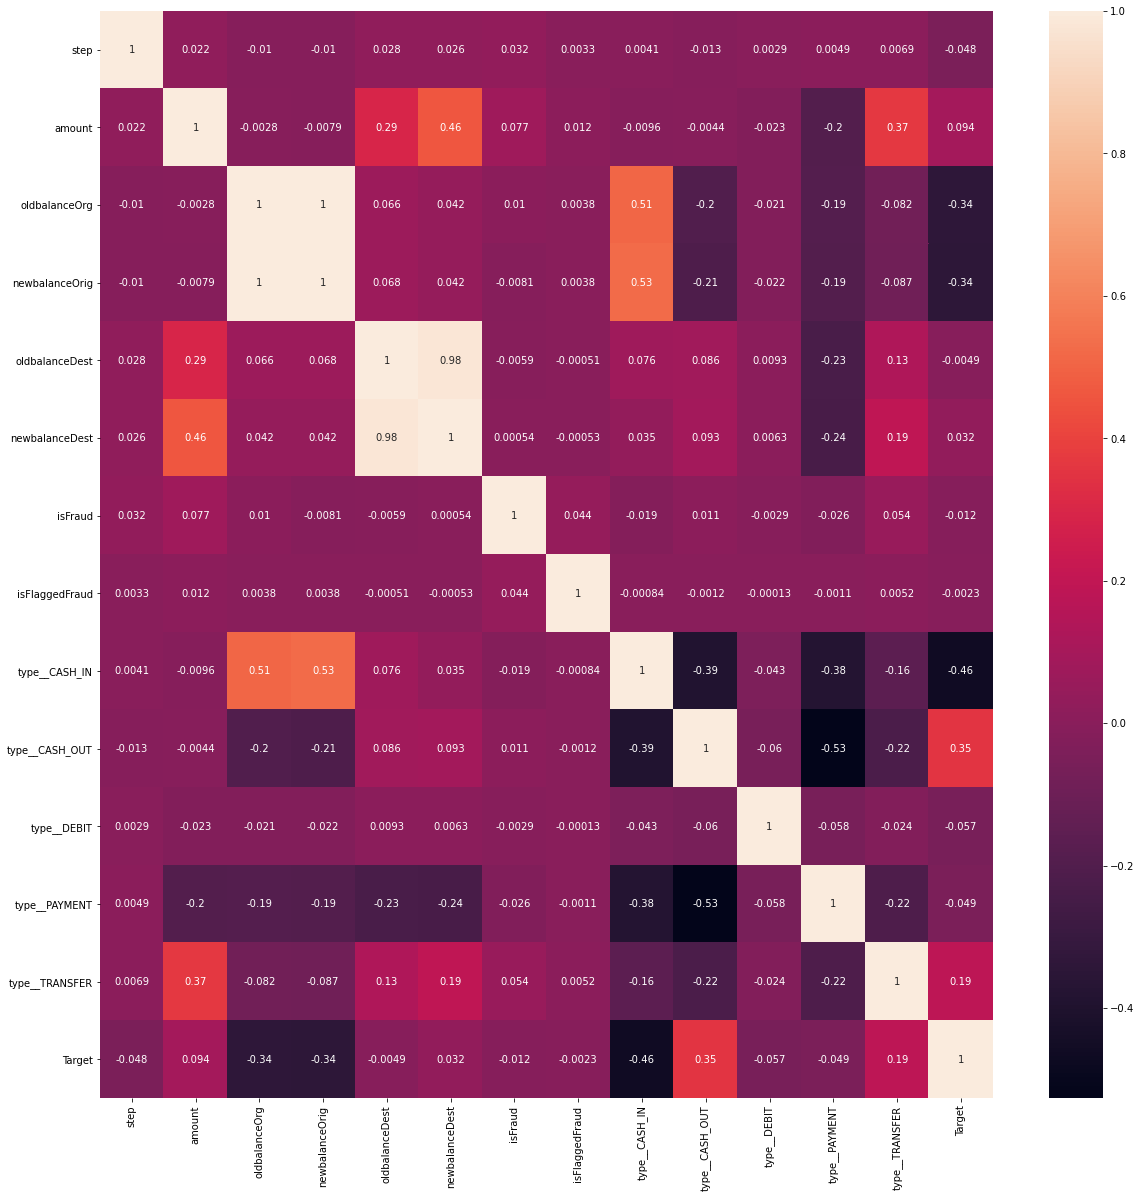

In [90]:
plt.figure(figsize=(20,20))
sns.heatmap(df2.corr(),annot=True)

In [116]:
df2.drop('txn_type',axis=1,inplace=True)

In [117]:
df2

step      amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0           1     9839.64      170136.00       160296.36            0.00   
1           1     1864.28       21249.00        19384.72            0.00   
2           1      181.00         181.00            0.00            0.00   
3           1      181.00         181.00            0.00        21182.00   
4           1    11668.14       41554.00        29885.86            0.00   
...       ...         ...            ...             ...             ...   
6362615   743   339682.13      339682.13            0.00            0.00   
6362616   743  6311409.28     6311409.28            0.00            0.00   
6362617   743  6311409.28     6311409.28            0.00        68488.84   
6362618   743   850002.52      850002.52            0.00            0.00   
6362619   743   850002.52      850002.52            0.00      6510099.11   

         newbalanceDest  isFraud  isFlaggedFraud  type__CASH_IN  \
0                  0.00        0               0              0   
1                  0.00        0               0              0   
2                  0.00        1               0              0   
3                  0.00        1               0              0   
4                  0.00        0               0              0   
...                 ...      ...             ...            ...   
6362615       339682.13        1               0              0   
6362616            0.00        1               0              0   
6362617      6379898.11        1               0              0   
6362618            0.00        1               0              0   
6362619      7360101.63        1               0              0   

         type__CASH_OUT  type__DEBIT  type__PAYMENT  type__TRANSFER  Target  
0                     0            0              1               0       1  
1                     0            0              1               0       1  
2                     0            0              0               1       1  
3                     1            0              0               0       1  
4                     0            0              1               0       1  
...                 ...          ...            ...             ...     ...  
6362615               1            0              0               0       0  
6362616               0            0              0               1       1  
6362617               1            0              0               0       0  
6362618               0            0              0               1       1  
6362619               1            0              0               0       0  

[6362620 rows x 14 columns]

In [121]:
# Splitting training and test data
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(df2.drop(["Target",'isFraud'],axis = 1),df2.Target,test_size=0.2,random_state=0)

In [122]:
# Scalling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# LOGISTIC REGRESSION

In [123]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
mod1 = logr.fit(x_train,y_train)
y_pred11 = mod1.predict(x_test)

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print("confusion_matrix")
log_conf = confusion_matrix(y_pred11,y_test)
print(log_conf)
print()
print("accuracy_score")
log_acc = accuracy_score(y_pred11,y_test)
print(log_acc)
print()
print("classification_report")
log_cr = classification_report(y_pred11,y_test)
print(log_cr)
print()

confusion_matrix
[[210845  42302]
 [205265 814112]]

accuracy_score
0.8054519993336079

classification_report
              precision    recall  f1-score   support

           0       0.51      0.83      0.63    253147
           1       0.95      0.80      0.87   1019377

    accuracy                           0.81   1272524
   macro avg       0.73      0.82      0.75   1272524
weighted avg       0.86      0.81      0.82   1272524


